# EDA and Pre-processing

In this file we have performed exploratory data analysis and pre-processing of the [Spotify music Multi-class genre dataset](https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify).

<!-- <div>
    <img src="attachment:Screenshot 2024-04-22 at 12.39.25 AM.png" width="500"/>
</div> -->

The pre-processing has the next parts:

- Loads the data.
- Displays basic information, the first few rows, and a statistical description.
- Checks for missing values.
- Performs data cleaning by removing unnecessary columns adn rows.
- Identify, explore and display outliers.
- Encodes the genre column with one-hot encoding.
- Conducts a correlation analysis to identify relationships among features.
- Selects a subset of features based on moderate to high correlations.
- etc
- etc
- etc

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import zscore

## Load the data

In [2]:
data = pd.read_csv("genres_v2.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h5>a DtypeWarning</h5> indicates that some columns in our data have mixed data types. This can happen when a column has inconsistent data, such as both numeric and string values, or missing data leading to dtype inference issues. We handleed this issue in the following steps.

## Basic Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [4]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [5]:
first_few_rows = data.head()
data_types = data.dtypes
print("First few rows:")
print(first_few_rows)

First few rows:
   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pg

<h4>Dataset Overview:</h4>
<h5>Total Rows:</h5> 

- 42,305
  
<h5>Total Columns:</h5> 

- 22
  
<h5>Data Types:</h5> 

- The dataset has 10 columns with float data type
- 4 with integer data type, and 8 with object data type.

## Data Types for Each Column

In [6]:
data_types = data.dtypes
print("Data Types for Each Column:")
print(data_types)

Data Types for Each Column:
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object


### Checking for missing values

In [7]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

## Separate Numerical and Categorical Columns

In [8]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(categorical_columns)


Numerical Columns:
['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'Unnamed: 0']

Categorical Columns:
['type', 'id', 'uri', 'track_href', 'analysis_url', 'genre', 'song_name', 'title']


## Identify potential mixed data types

In [9]:
potential_issues = []
for col in data.columns:
    unique_types = data[col].apply(type).nunique()
    if unique_types > 1:
        potential_issues.append(col)

print("\nColumns with Potential Mixed Data Types:")
print(potential_issues)


Columns with Potential Mixed Data Types:
['song_name', 'title']


<h4>Observations</h4>

<h5>Columns with Mixed Data Types:</h5>

- There is a DtypeWarning indicating a mixed data type issue in column "song_name". This is likely caused by the presence of non-string values or inconsistencies.

### Standardize 'song_name' by converting non-string values to NaN

In [10]:
data['song_name'] = data['song_name'].apply(lambda x: x if isinstance(x, str) else pd.NA)

- As we mentioned above, there is a DtypeWarning indicating a mixed data type issue and which is in column "song_name". This is likely caused by the presence of non-string values or inconsistencies. 

## Data Cleaning & Drop unnecessary columns


<h5>Columns with Missing Data:</h5>

- "Unnamed: 0" and "title" have around 20,780 non-null entries.
- "song_name" has 21,519 non-null entries, indicating a significant amount of missing data.
- Other columns such as "type", "id", "uri", "track_href", "analysis_url" should be dropped, since we decided they are not useful for further analysis.

In [11]:
data_cleaned = data.dropna(subset=['song_name'])

In [12]:
data_cleaned = data_cleaned.drop(["Unnamed: 0", "title", "type", "id", "uri", "track_href", "analysis_url"], axis=1)

In [29]:
# new_csv_path = "new_file.csv"
# data_cleaned.to_csv(new_csv_path, index=False)  

In [13]:
data_cleaned.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


#### Cleaned data observation

In [14]:
data_cleaned.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000,21519.000000
mean,0.674583,0.657252,5.144942,-7.039576,0.583020,0.178072,0.167282,0.075957,0.195378,0.417385,151.480713,194521.728844,3.968539
std,0.159427,0.175719,3.693472,2.906579,0.493071,0.140648,0.208450,0.220703,0.151472,0.233708,29.137425,60376.433104,0.325633
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.021000,0.020600,57.967000,38333.000000,1.000000
25%,0.566000,0.535000,1.000000,-8.645500,0.000000,0.056850,0.016800,0.000000,0.101000,0.223000,129.961000,150715.000000,4.000000
50%,0.697000,0.660000,5.000000,-6.687000,1.000000,0.133000,0.080000,0.000001,0.130000,0.401000,149.648000,191587.000000,4.000000
75%,0.796000,0.792000,8.000000,-5.049500,1.000000,0.277000,0.239000,0.000713,0.250000,0.593000,174.029000,230636.500000,4.000000
max,0.988000,0.999000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.973000,0.980000,220.290000,728413.000000,5.000000


#### Here it can be compared with original data 

In [15]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


## Visualization of Inintial and Cleaned data

- In the provided histogram and box plot of a feature like "danceability," it is evident that the original data underwent substantial transformation following data cleaning.

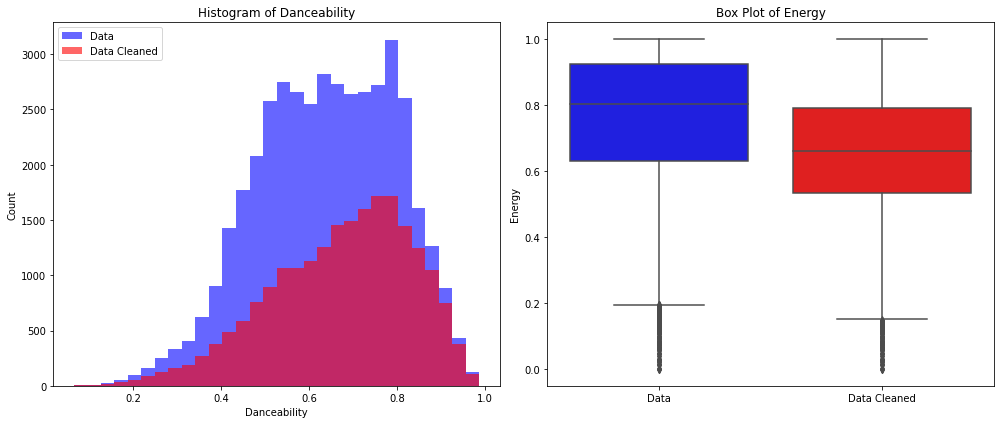

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# histograms to compare 'danceability' between data and data_cleaned
axes[0].hist(data['danceability'], bins=30, alpha=0.6, label='Data', color='b')
axes[0].hist(data_cleaned['danceability'], bins=30, alpha=0.6, label='Data Cleaned', color='r')
axes[0].set_title("Histogram of Danceability")
axes[0].set_xlabel("Danceability")
axes[0].set_ylabel("Count")
axes[0].legend()

# plots to compare other features
sns.boxplot(data=[data['energy'], data_cleaned['energy']], ax=axes[1], palette=["blue", "red"])
axes[1].set_title("Box Plot of Energy")
axes[1].set_xticklabels(['Data', 'Data Cleaned'])
axes[1].set_ylabel("Energy")

plt.tight_layout()
plt.show()

# Data Analysis

### Data Distribution 

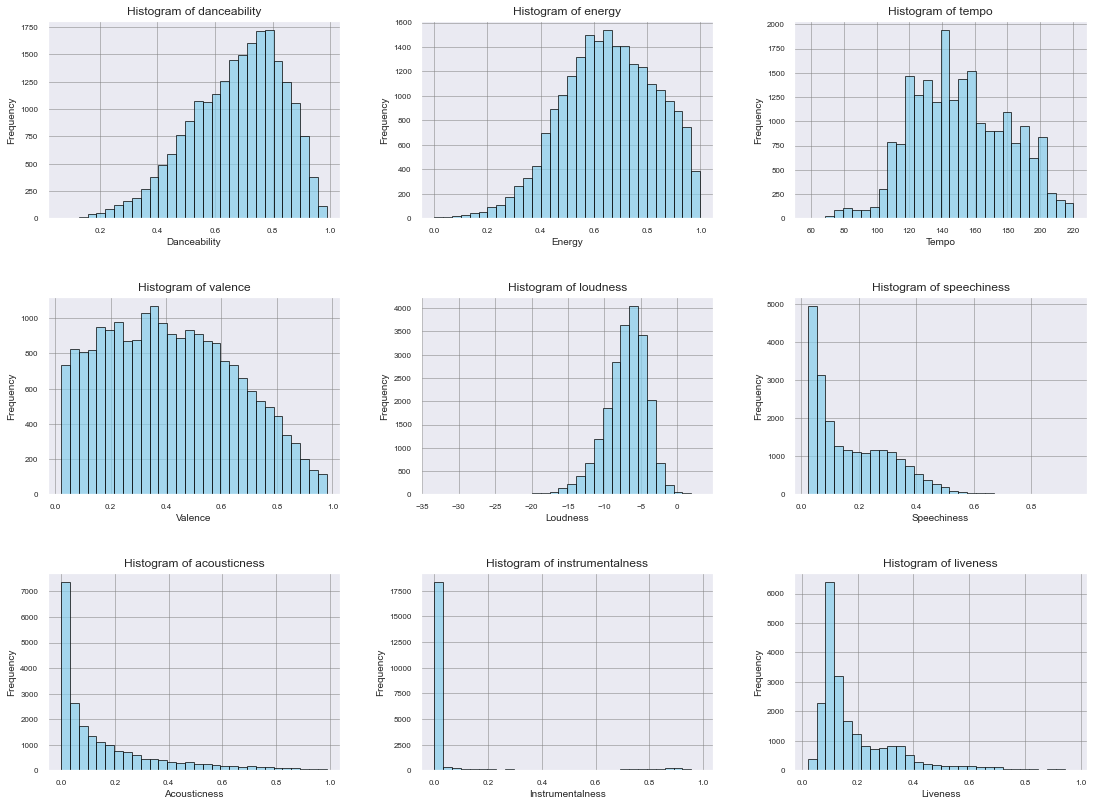

In [17]:
sns.set_theme(style="darkgrid", palette="pastel")

key_columns = ["danceability", "energy", "tempo", "valence", "loudness", 
               "speechiness", "acousticness", "instrumentalness", "liveness"]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(key_columns):
    axes[idx].hist(data_cleaned[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Histogram of {col}', fontsize=12)
    axes[idx].set_xlabel(col.capitalize(), fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].tick_params(axis='both', which='major', labelsize=8)
    axes[idx].tick_params(axis='both', which='minor', labelsize=6)
    
    axes[idx].grid(which='major', linestyle='-', linewidth='0.5', color='grey')
    axes[idx].grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

plt.tight_layout(pad=3.0)
plt.show()

<h4>Observations:</h4>

- <h5>Danceability, Energy, Liveness, Valence:</h5>These features show a fairly continuous and varied distribution, indicating diverse characteristics of the data.

- <h5>Loudness:</h5>This feature is somewhat left-skewed, showing that most songs have a higher loudness but a few are significantly quieter.

- <h5>Speechiness, Acousticness, Instrumentalness:</h5>These attributes show high concentration of values close to zero, indicating many songs have low speechiness, acousticness, and instrumentalness but a few outliers with high values.

- <h5>Tempo:</h5>The distribution of tempo appears to be multimodal, suggesting the presence of different genres with preferred tempo ranges.

## Outlier Investigation

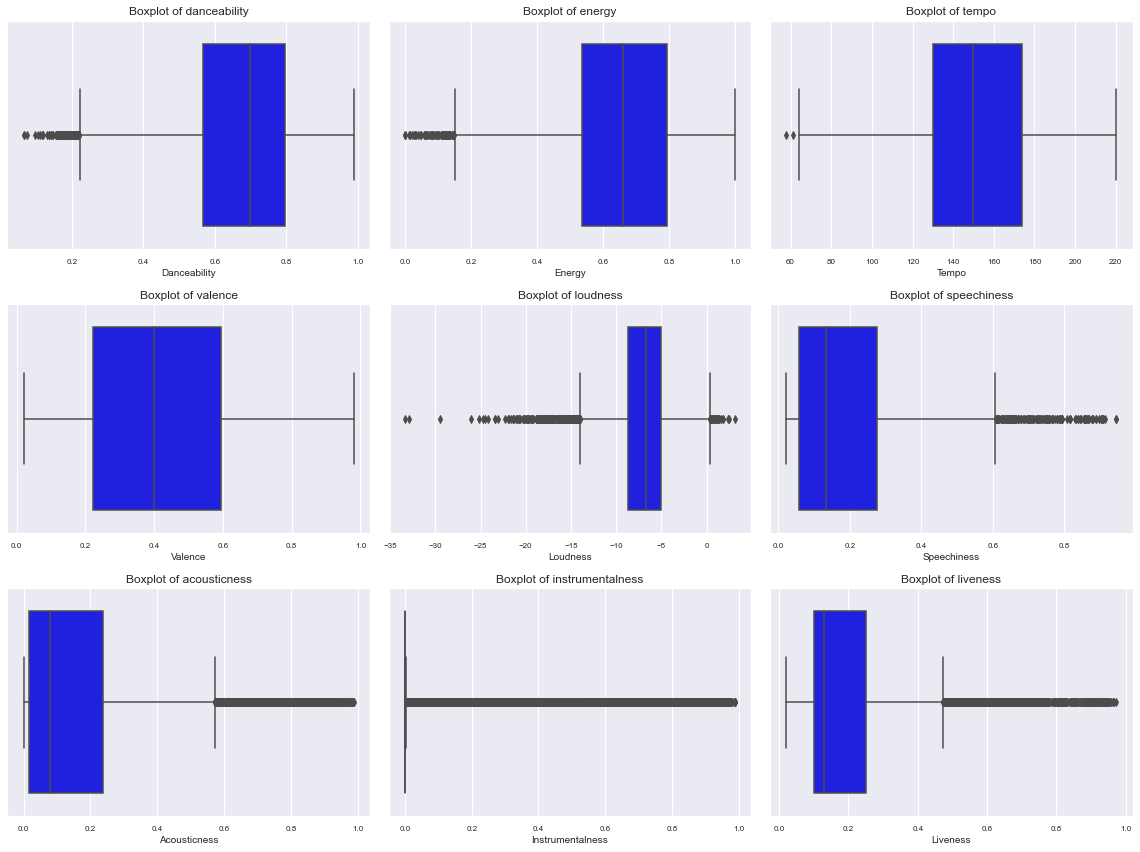

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()  

for idx, col in enumerate(key_columns):
    sns.boxplot(x=data_cleaned[col], ax=axes[idx], color='blue')
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12)  
    axes[idx].set_xlabel(col.capitalize(), fontsize=10)  

    axes[idx].tick_params(axis='x', labelsize=8)
    axes[idx].tick_params(axis='y', labelsize=8)

for ax in axes[len(key_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

<h4>Loudness, Speechiness, Acousticness, Instrumentalness, Liveness:</h4> These features show a number of outliers, particularly values that are far from the median, which could impact analyses if not addressed appropriately.

<h4>Danceability, Energy, Valence, Tempo:</h4> While these features also exhibit outliers, they are less extreme compared to the other features mentioned above.

## Handling with outliers


- We have used the Interquartile Range (IQR) method to filter out outliers from key columns that could impact model performance.

- After removing outliers, the dataset has been reduced from 21,519 rows to 14,277 rows, indicating a significant number of outliers were removed from the specified columns.

Outliers removed per column: {'loudness': 479, 'speechiness': 167, 'acousticness': 1423, 'instrumentalness': 4317, 'liveness': 856}
Original data rows: 21519
Cleaned data rows: 14277


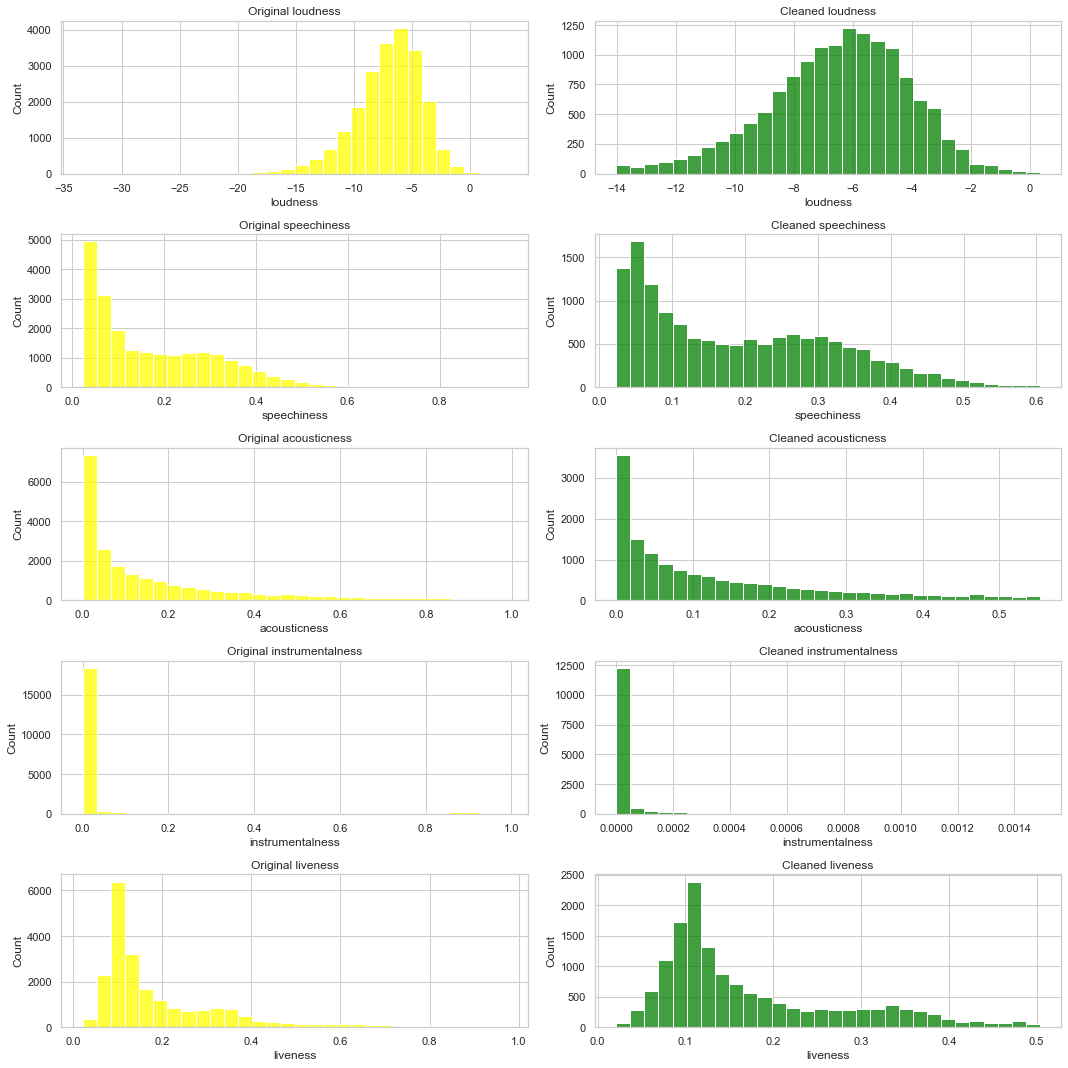

In [19]:
file_path = 'new_file.csv'  # Adjust the path as necessary
data = pd.read_csv(file_path)

sns.set(style="whitegrid")

# handling outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df[mask], df[~mask]

# columns identified with significant outliers
outlier_columns = ['loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# appling outlier handling to the dataset
cleaned_data = data.copy()
outliers_removed = {}
for col in outlier_columns:
    cleaned_data, outliers = handle_outliers(cleaned_data, col)
    outliers_removed[col] = len(outliers)

print("Outliers removed per column:", outliers_removed)
print("Original data rows:", len(data),) 
print("Cleaned data rows:", len(cleaned_data))

# compare distributions before and after cleaning
fig, axes = plt.subplots(len(outlier_columns), 2, figsize=(15, len(outlier_columns) * 3))
for i, col in enumerate(outlier_columns):
    sns.histplot(data[col], bins=30, kde=False, ax=axes[i, 0], color='yellow')
    axes[i, 0].set_title(f'Original {col}')
    sns.histplot(cleaned_data[col], bins=30, kde=False, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Cleaned {col}')

plt.tight_layout()
plt.show()

#### Outliers Removed:

- Loudness: 479 outliers removed
- Speechiness: 167 outliers removed
- Acousticness: 1423 outliers removed
- Instrumentalness: 4317 outliers removed
- Liveness: 856 outliers removed

#### Dataset Row Counts:

- Original Data Rows: 21,519
- Cleaned Data Rows: 14,277
- This indicates that after removing outliers, the dataset was reduced to 14,277 rows from the original 21,519, suggesting that a significant portion of the data (approximately 33%) was considered outliers according to the IQR thresholds.

#### Visual Analysis of Distributions:
##### From the histograms:

#### Original vs. Cleaned Data:

- Each pair of histograms shows the original data (yellow) and the cleaned data (green) for each variable.
- For most variables, the cleaned histograms appear more concentrated around the median, reflecting the effect of removing extreme values.
- This is particularly noticeable in the 'instrumentalness' variable, where a substantial number of outliers have been removed, leading to a notable shift in the distribution.
- The histograms for 'loudness', 'speechiness', and 'liveness' show cleaner, more uniform distributions post-cleaning, indicating the effectiveness of outlier removal in normalizing data.

In [87]:
# cleaned_data.to_csv('outliers.csv', index=False)

## Feature Scaling 

#### Observations from the Scaling Process

- Consistency in Transformation Methods:
The transformation methods (standardization and normalization) were applied as intended. These techniques are critical for preparing data for machine learning models that are sensitive to the scale and distribution of the input features.

- Please, find more information regarding the analysis and insights below, after results observation for better understaning.

In [20]:
# dont forget to change data file to cleaned_data
# numerical columns (excluding any categorical columns)
numerical_columns = cleaned_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# If there are specific columns to exclude (like IDs), remove them from the list
# numerical_columns.remove('id_column')

# Initialize scalers
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Standardization of the data
standardized_data = cleaned_data.copy()
standardized_data[numerical_columns] = standard_scaler.fit_transform(cleaned_data[numerical_columns])

# Normalization of the data
normalized_data = cleaned_data.copy()
normalized_data[numerical_columns] = min_max_scaler.fit_transform(cleaned_data[numerical_columns])

# Optionally save or return the scaled datasets
# standardized_data.to_csv('standardized_data.csv', index=False)
# normalized_data.to_csv('normalized_data.csv', index=False)

# Print the first few rows of the transformed data to verify
# print("Standardized Data:")
# print(standardized_data.head())
# print("\nNormalized Data:")
# print(normalized_data.head())

In [21]:
standardized_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
1,0.138117,-1.147735,0.790958,-0.297077,0.827767,-0.849468,1.999090,-0.303403,-0.523579,-1.504682,-1.268707,0.499072,0.076270,Dark Trap,Pathology
2,1.002736,1.416051,-0.019276,0.727786,0.827767,-0.979608,-0.827790,-0.282465,1.921315,-1.884980,2.235080,-1.684751,0.076270,Dark Trap,Symbiote
3,-1.465719,0.698191,-1.369667,0.758360,0.827767,-0.669860,-0.755511,-0.303403,-0.562081,-1.276234,1.176764,-1.252875,-3.358777,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.659529,-0.308095,-0.829511,-0.480522,0.827767,0.776136,0.655738,-0.303403,-0.061551,0.587185,-0.148938,-1.259186,0.076270,Dark Trap,Venom
7,-0.026887,0.249528,0.790958,0.417018,0.827767,0.228179,-0.638698,-0.303403,-0.581332,-0.792462,-0.487135,-1.185712,-3.358777,Dark Trap,T.R.U. (Totally Rotten Underground)


In [22]:
normalized_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
1,0.710838,0.364780,0.727273,0.473468,1.0,0.096597,0.725135,0.000000,0.200828,0.097054,0.338346,0.265626,0.75,Dark Trap,Pathology
2,0.853245,0.867925,0.454545,0.643647,1.0,0.067205,0.024951,0.002779,0.726708,0.007393,0.986270,0.082602,0.75,Dark Trap,Symbiote
3,0.446679,0.727044,0.000000,0.648724,1.0,0.137161,0.042853,0.000000,0.192547,0.150914,0.790565,0.118797,0.50,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.796717,0.529560,0.181818,0.443007,1.0,0.463733,0.392403,0.000000,0.300207,0.590242,0.545415,0.118268,0.75,Dark Trap,Venom
7,0.683661,0.638994,0.727273,0.592044,1.0,0.339979,0.071787,0.000000,0.188406,0.264970,0.482875,0.124426,0.50,Dark Trap,T.R.U. (Totally Rotten Underground)


In [85]:
# standardized_data.to_csv('standardized_data.csv', index=False)
# normalized_data.to_csv('normalized_data.csv', index=False)

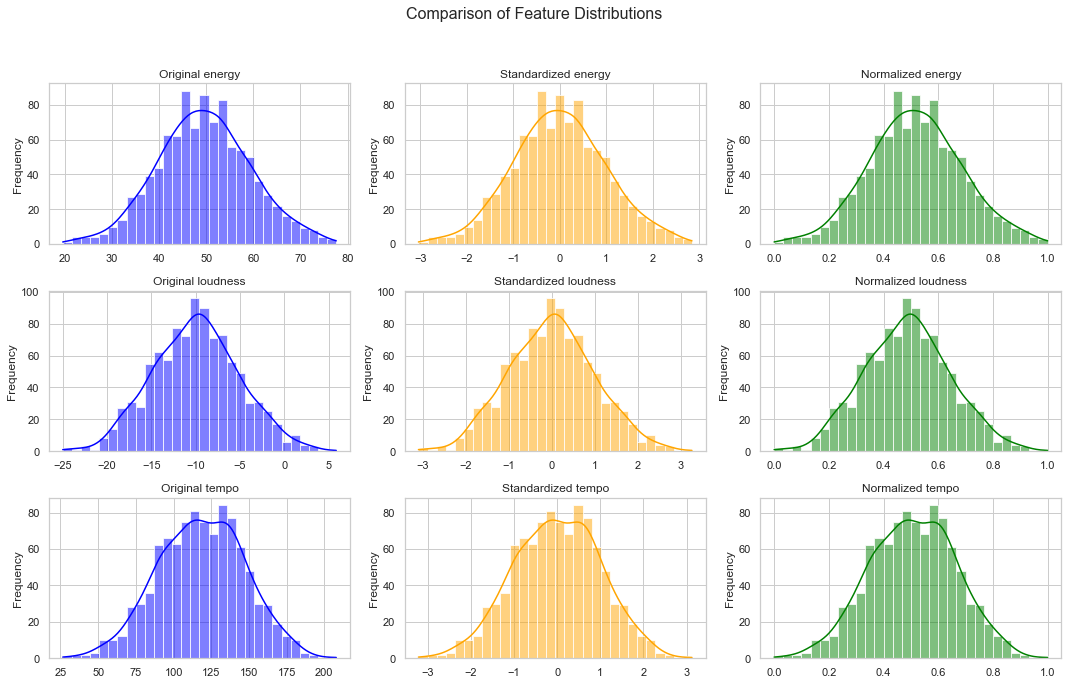

In [23]:
# Simulating some data
np.random.seed(0)
data = pd.DataFrame({
    'energy': np.random.normal(loc=50, scale=10, size=1000),
    'loudness': np.random.normal(loc=-10, scale=5, size=1000),
    'tempo': np.random.normal(loc=120, scale=30, size=1000)
})

# Standardize
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Normalize
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Plotting
features_to_plot = ['energy', 'loudness', 'tempo']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Comparison of Feature Distributions', fontsize=16)

for i, feature in enumerate(features_to_plot):
    # Original data histogram
    sns.histplot(data[feature], bins=30, kde=True, ax=axes[i, 0], color='blue')
    axes[i, 0].set_title(f'Original {feature}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Frequency')

    # Standardized data histogram
    sns.histplot(standardized_data[feature], bins=30, kde=True, ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Standardized {feature}')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('Frequency')

    # Normalized data histogram
    sns.histplot(normalized_data[feature], bins=30, kde=True, ax=axes[i, 2], color='green')
    axes[i, 2].set_title(f'Normalized {feature}')
    axes[i, 2].set_xlabel('')
    axes[i, 2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

<h4>Original Data Distribution:</h4> Displays the raw values of each feature, which may vary widely in terms of range and center.
<h4>Normalized Data Distribution:</h4> All features have been scaled between 0 and 1. Despite this rescaling, the shapes of the distributions remain similar to the original data but fit within a constrained range.
<h4>Standardized Data Distribution:</h4> Features have been scaled to have zero mean and unit variance. The shape of the distributions may look similar to the original data, but they are centered around zero and most data points lie between -3 and 3.

#### Visual Similarity in Distributions:

- We noted that the visualizations before and after scaling seemed similar, suggesting that the transformations might not have drastically altered the shape of the data's distribution. This is characteristic of these scaling methods as they primarily alter the scale and range but not the shape of the distribution.
  
#### Insights from the Results

- Effectiveness of Standardization:
Standardization adjusted the mean to 0 and the standard deviation to 1. This is particularly useful for models that rely on the assumption of normally distributed data or those that incorporate regularization (like Lasso or Ridge Regression). The lack of visible change in the histogram’s shape is expected because standardization does not alter the inherent distribution, just re-scales it.

- Impact of Normalization:
Normalization adjusted the data to fit within a [0, 1] range. This is crucial for models that operate with inputs where magnitude is important, such as neural networks and k-nearest neighbors. Normalization ensures that no feature dominates due to its scale, which could mislead the learning algorithm.


## FOR Louai: the part below should be modified or changed after model building, what do you think?
- Choice of Scaling Method:
The choice between standardization and normalization will be guided by the model’s needs and the data characteristics. If the original data features were already within a similar range and distribution, the impact of these transformations might be minimal visually but still critical for model training performance.

- Data Quality and Consistency:
Ensuring data quality and consistent preprocessing steps across all datasets (training, validation, test) is essential. Any discrepancies in how data is scaled during different phases of model training and evaluation can lead to misleading results and poor model performance.

- Model Sensitivity:
Different models have varying sensitivities to feature scaling. Linear models, support vector machines, and neural networks typically benefit the most from feature scaling, while tree-based models are generally invariant to the scale of the features.

- Conclusion
Even if visual inspections do not reveal dramatic changes, feature scaling is a fundamental step in data preprocessing that can significantly influence the outcome and performance of many machine learning algorithms. The key is to choose the appropriate scaling technique based on the specific requirements of the algorithm and the nature of the data.

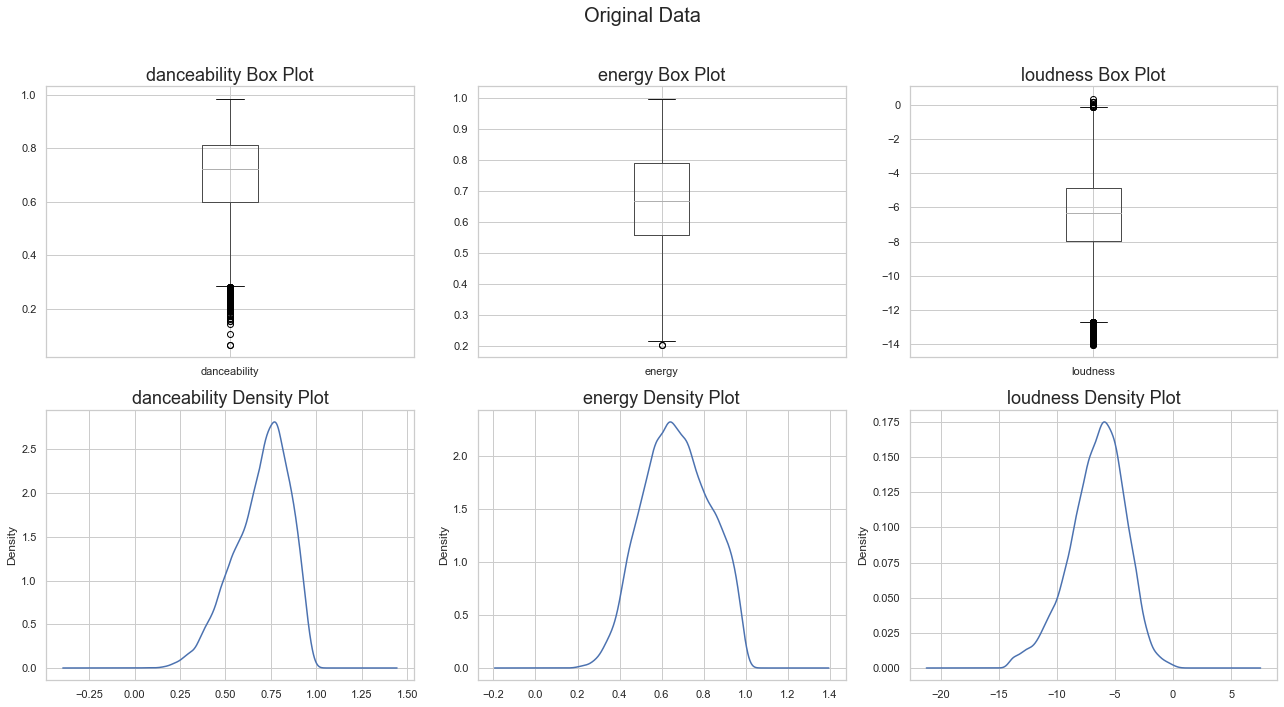

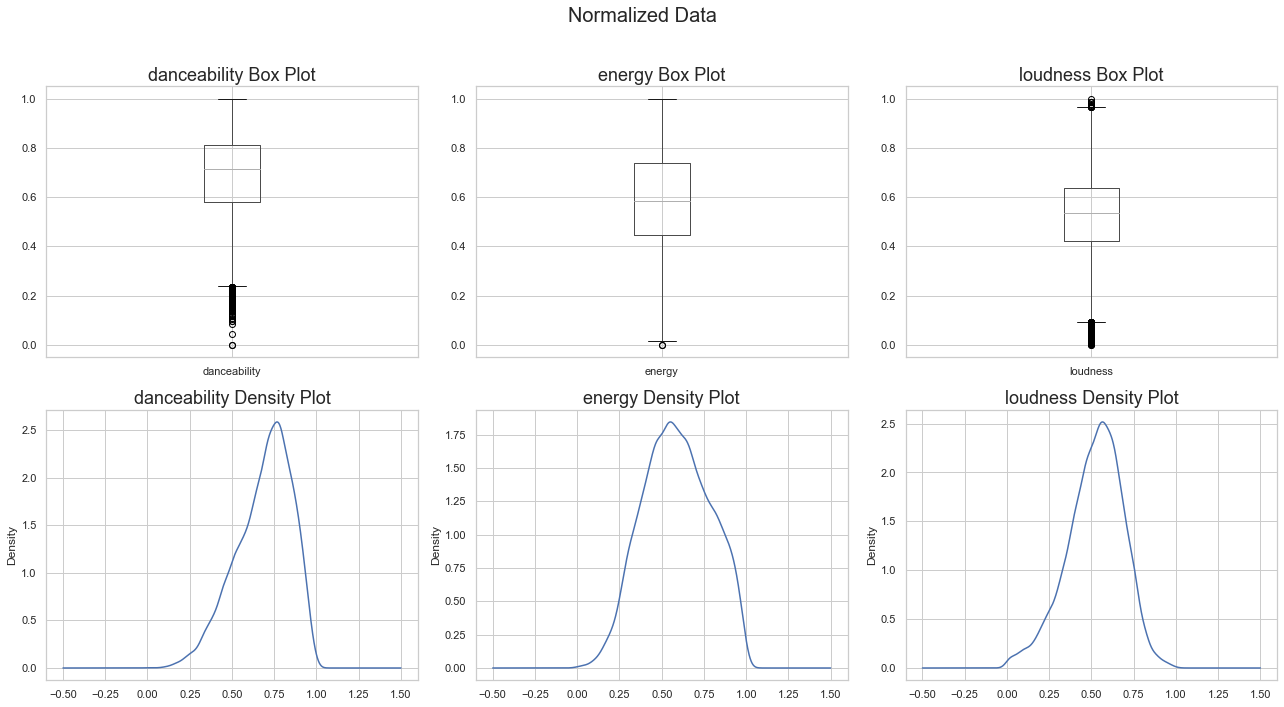

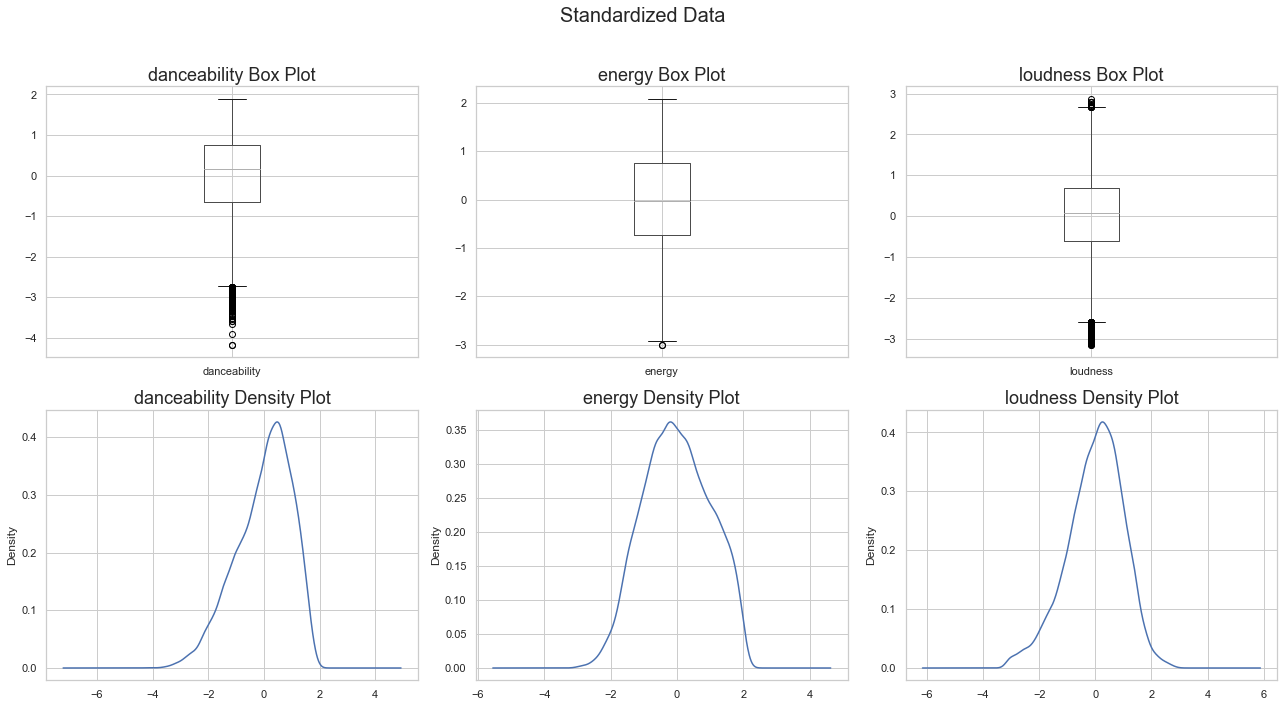

In [26]:
def load_data(file_path):
    return pd.read_csv(file_path)
    

def print_statistics(data, title):
    print(f"Summary Statistics for {title}:")
    print(data.describe(), "\n")

# def plot_histograms(data, title):
#     fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#     features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness']
#     for ax, feature in zip(axes.flatten(), features):
#         data[feature].hist(ax=ax, bins=20, alpha=0.7)
#         ax.set_title(f'{feature} distribution')
#     fig.suptitle(title, fontsize=16)
#     plt.tight_layout(rect=[0, 0, 1, 0.96])
#     plt.show()

def plot_box_density(data, title, features=['danceability', 'energy', 'loudness']):
    fig, axes = plt.subplots(2, len(features), figsize=(18, 10))
    for i, feature in enumerate(features):
        # Box plot
        data.boxplot(column=feature, ax=axes[0, i])
        axes[0, i].set_title(f'{feature} Box Plot', fontsize=18)  # Adjust fontsize here
        # Density plot
        data[feature].plot(kind='density', ax=axes[1, i])
        axes[1, i].set_title(f'{feature} Density Plot', fontsize=18)  # Adjust fontsize here
    plt.suptitle(title, fontsize=20)  # Adjust main title fontsize here
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Load datasets
outliers_data = load_data('outliers.csv')
normalized_data = load_data('normalized_data.csv')
standardized_data = load_data('standardized_data.csv')


# print_statistics(outliers_data, "Original Data")
# print_statistics(normalized_data, "Normalized Data")
# print_statistics(standardized_data, "Standardized Data")


# plot_histograms(outliers_data, "Original Data Distribution")
# plot_histograms(normalized_data, "Normalized Data Distribution")
# plot_histograms(standardized_data, "Standardized Data Distribution")

plot_box_density(outliers_data, "Original Data")
plot_box_density(normalized_data, "Normalized Data") 
plot_box_density(standardized_data, "Standardized Data")

## Z-Score

#### Why Applying Z-Score was Beneficial:

- ##### Normalization of Data Features:
Z-scores standardize the data by converting feature values to a common scale with a mean of zero and a standard deviation of one. This normalization is particularly useful in datasets where different columns have different units or scales.

- ##### Enhanced Data Quality:
Outliers can skew the results of statistical analyses and machine learning models, leading to misleading conclusions or poor predictive performance. Removing these outliers helps in achieving more accurate and reliable results.

- ##### Improved Assumptions Adherence:
Many statistical methods and algorithms assume normally distributed data, or at least symmetric distribution without extreme outliers. Removing outliers using the Z-score method helps better meet these assumptions, thus optimizing the performance of these methods.

- ##### Robust Statistical Analysis:
With outliers removed, statistical measures such as mean, variance, and correlation are more representative of the underlying dataset. Outliers can disproportionately influence these measures, and their removal leads to more stable and reliable statistics.

- ##### Data Integrity:
In many cases, extreme outliers are the result of errors in data collection, processing, or entry. Identifying and removing these through Z-score analysis helps maintain the integrity of the data set.

In [27]:
data = pd.read_csv('outliers.csv')

# Assuming 'data' only contains numeric columns or you specify them as shown earlier
numeric_cols = data.select_dtypes(include=[np.number]).columns
z_scores = data[numeric_cols].apply(zscore)

# Filter the data: keep only rows where all z-scores are within the threshold of 3 standard deviations
filtered_data = data[(z_scores.abs() <= 3).all(axis=1)]

# Save the filtered data to a new CSV if needed
filtered_data.to_csv('filtered_outliers.csv', index=False)

# Display summary statistics of the original and filtered datasets
print("Original Data Shape:", data.shape)
print("Filtered Data Shape:", filtered_data.shape)

Original Data Shape: (14277, 15)
Filtered Data Shape: (12806, 15)


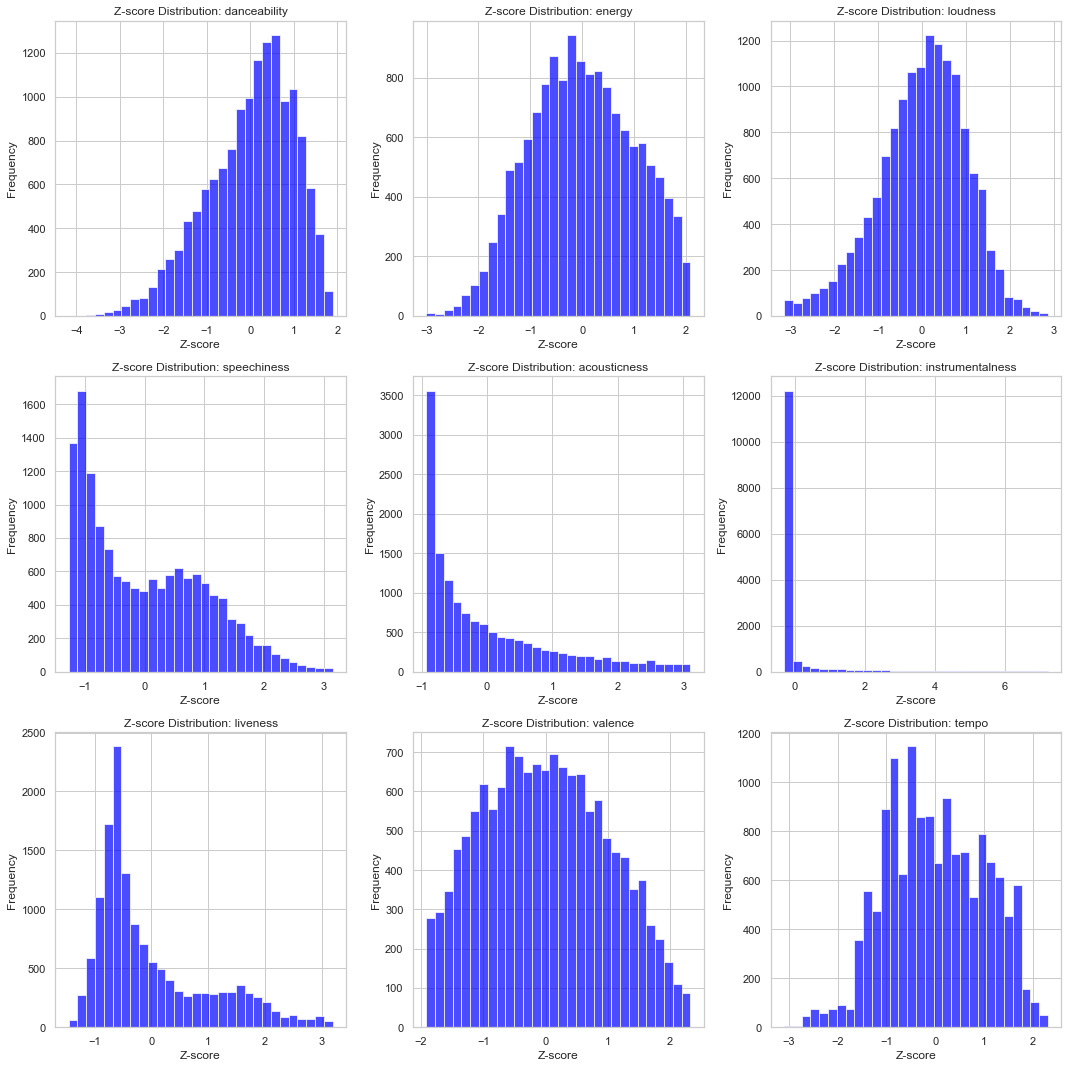

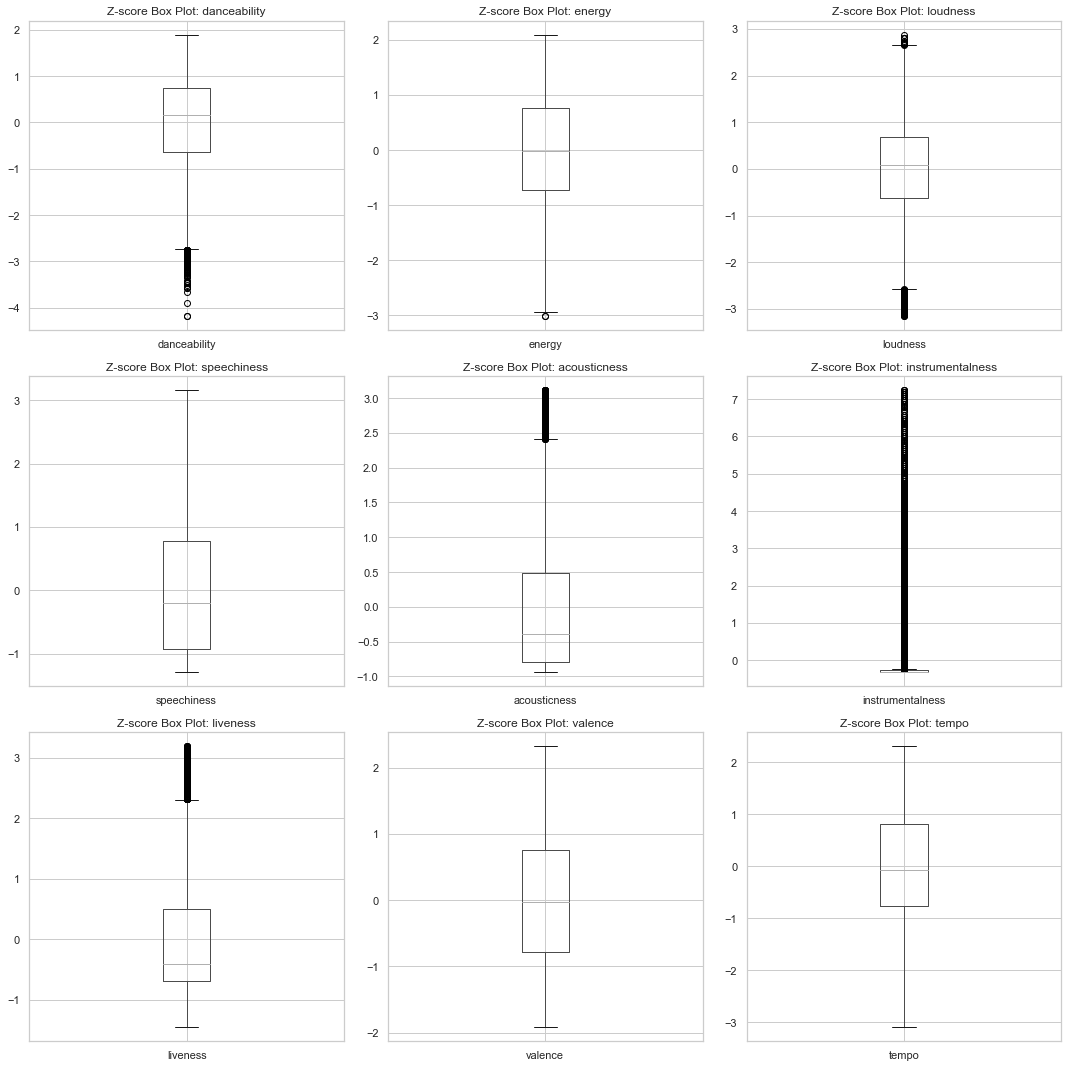

In [28]:
# Define the columns to include in the analysis
include_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate Z-scores for the included columns
z_scores = data[include_cols].apply(zscore)

# Number of columns in the plot layout
columns = 3
rows = (len(include_cols) + columns - 1) // columns  # Calculate rows needed, rounding up

# Plot histograms of Z-scores
fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing
for i, col in enumerate(include_cols):
    axes[i].hist(z_scores[col], bins=30, alpha=0.7, color='blue')
    axes[i].set_title(f'Z-score Distribution: {col}')
    axes[i].set_xlabel('Z-score')
    axes[i].set_ylabel('Frequency')
for ax in axes[len(include_cols):]:  # Hide unused subplots
    ax.axis('off')
plt.tight_layout()
plt.show()

# Plot box plots of Z-scores
fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, col in enumerate(include_cols):
    z_scores.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Z-score Box Plot: {col}')
for ax in axes[len(include_cols):]:  # Hide unused subplots
    ax.axis('off')
plt.tight_layout()
plt.show()

In [29]:
# # Load your data
# data = pd.read_csv('outliers.csv')

# Define the columns to include in the analysis
include_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate Z-scores for the included columns
z_scores = data[include_cols].apply(zscore)

# Filter the data with a default Z-score threshold
filtered_data = data[(z_scores.abs() <= 3).all(axis=1)]

# Filter the data with a stricter Z-score threshold
strict_filtered_data = data[(z_scores.abs() <= 2.5).all(axis=1)]

# Print summary of the changes
print("Original Data Shape:", data.shape)
print("Filtered Data Shape with 3.0 threshold:", filtered_data.shape)
print("Strictly Filtered Data Shape with 2.5 threshold:", strict_filtered_data.shape)

Original Data Shape: (14277, 15)
Filtered Data Shape with 3.0 threshold: (13549, 15)
Strictly Filtered Data Shape with 2.5 threshold: (12370, 15)


##### After applying the Z-score method for identifying and filtering outliers in your dataset, several useful observations and insights can be drawn from both the process and the resulting visualizations:

##### Effectiveness of Z-Score Filtering

- Threshold Sensitivity: The choice of Z-score threshold significantly impacts the amount of data considered as outliers. Reducing the threshold from 3 to 2.5 noticeably reduced the number of data points, indicating the presence of values moderately far from the mean but not extreme outliers.

- Data Distribution: The histograms before and after filtering show how the tails of the distributions are trimmed, reducing the skewness and potentially extreme values that can impact statistical analyses and model performance.

- Read below for more observations.

## Histogram

##### Visualization Impact

- Clarity in Data Changes: The separate histograms and box plots for the original, filtered, and strictly filtered data visually demonstrate the impact of outlier removal. You can clearly see the reduction in range and variability in the box plots and the smoothing of distribution tails in the histograms.
  
- Comparative Analysis: Visualizing the original and filtered data side-by-side allows for an immediate understanding of the filtering's impact, helping validate the Z-score method's effectiveness for your specific dataset.

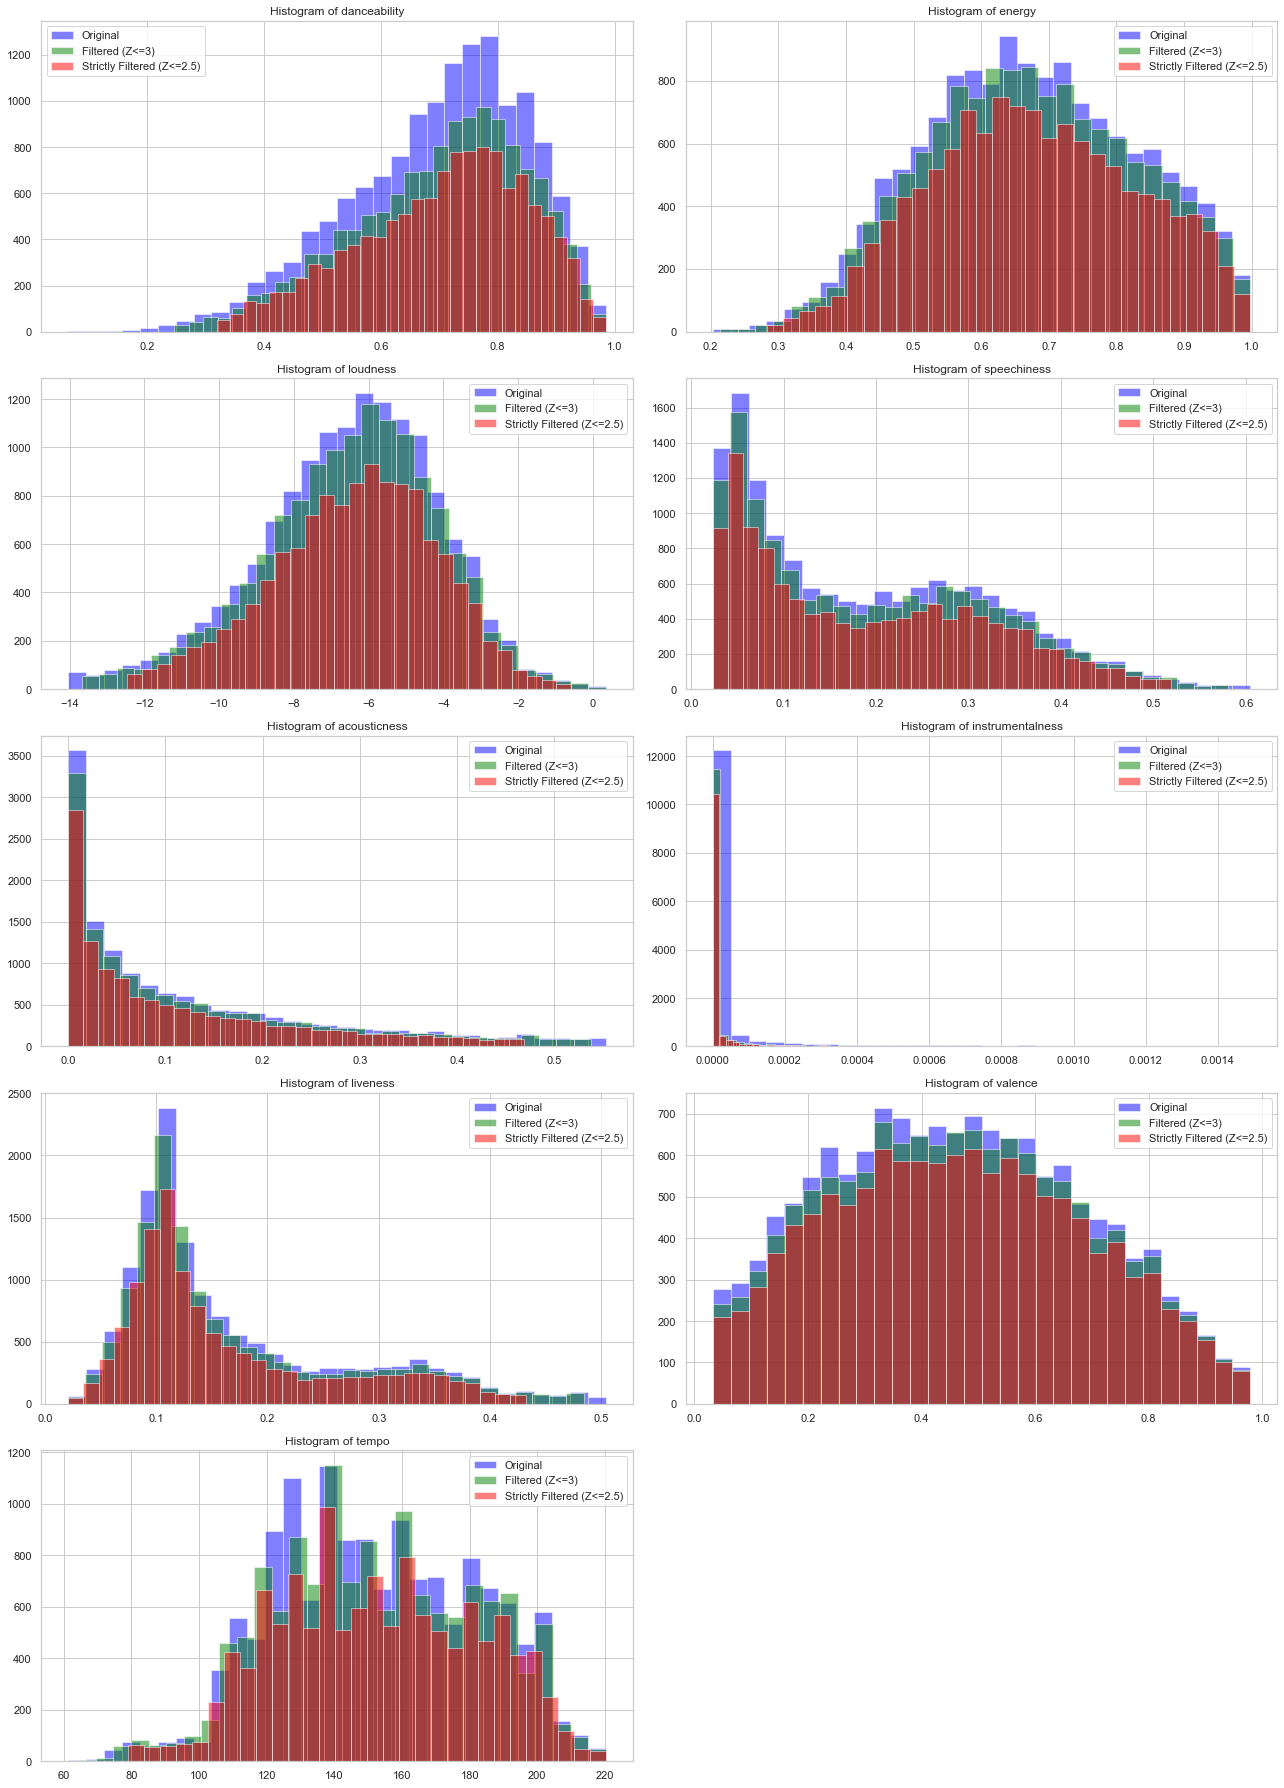

In [30]:
# Define the columns to include in the analysis
include_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate Z-scores for the included columns
z_scores = data[include_cols].apply(zscore)

# Filter the data with a default Z-score threshold
filtered_data = data[(z_scores.abs() <= 3).all(axis=1)]

# Filter the data with a stricter Z-score threshold
strict_filtered_data = data[(z_scores.abs() <= 2.5).all(axis=1)]

# Function to plot histograms for each feature
def plot_histograms(data, filtered_data, strict_filtered_data, features):
    rows = (len(features) + 1) // 2  # Determine the number of rows needed
    fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))  # Adjust size as needed
    axes = axes.flatten()
    for i, feature in enumerate(features):
        axes[i].hist(data[feature], bins=30, color='blue', alpha=0.5, label='Original')
        axes[i].hist(filtered_data[feature], bins=30, color='green', alpha=0.5, label='Filtered (Z<=3)')
        axes[i].hist(strict_filtered_data[feature], bins=30, color='red', alpha=0.5, label='Strictly Filtered (Z<=2.5)')
        axes[i].set_title(f'Histogram of {feature}')
        axes[i].legend()
    for ax in axes[len(features):]:  # Hide unused subplots
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the data
plot_histograms(data, filtered_data, strict_filtered_data, include_cols)

## Box Plots

##### Data Quality Improvement

- Reduction of Skewness: By removing outliers, the data distributions become less skewed, which is beneficial for many statistical methods and machine learning models that assume data normality or symmetric distribution.
- Improved Model Accuracy: Cleaner data, without extreme outliers, typically leads to more reliable and accurate predictive modeling, as outliers can disproportionately influence the model's training phase, especially in regression-based models.

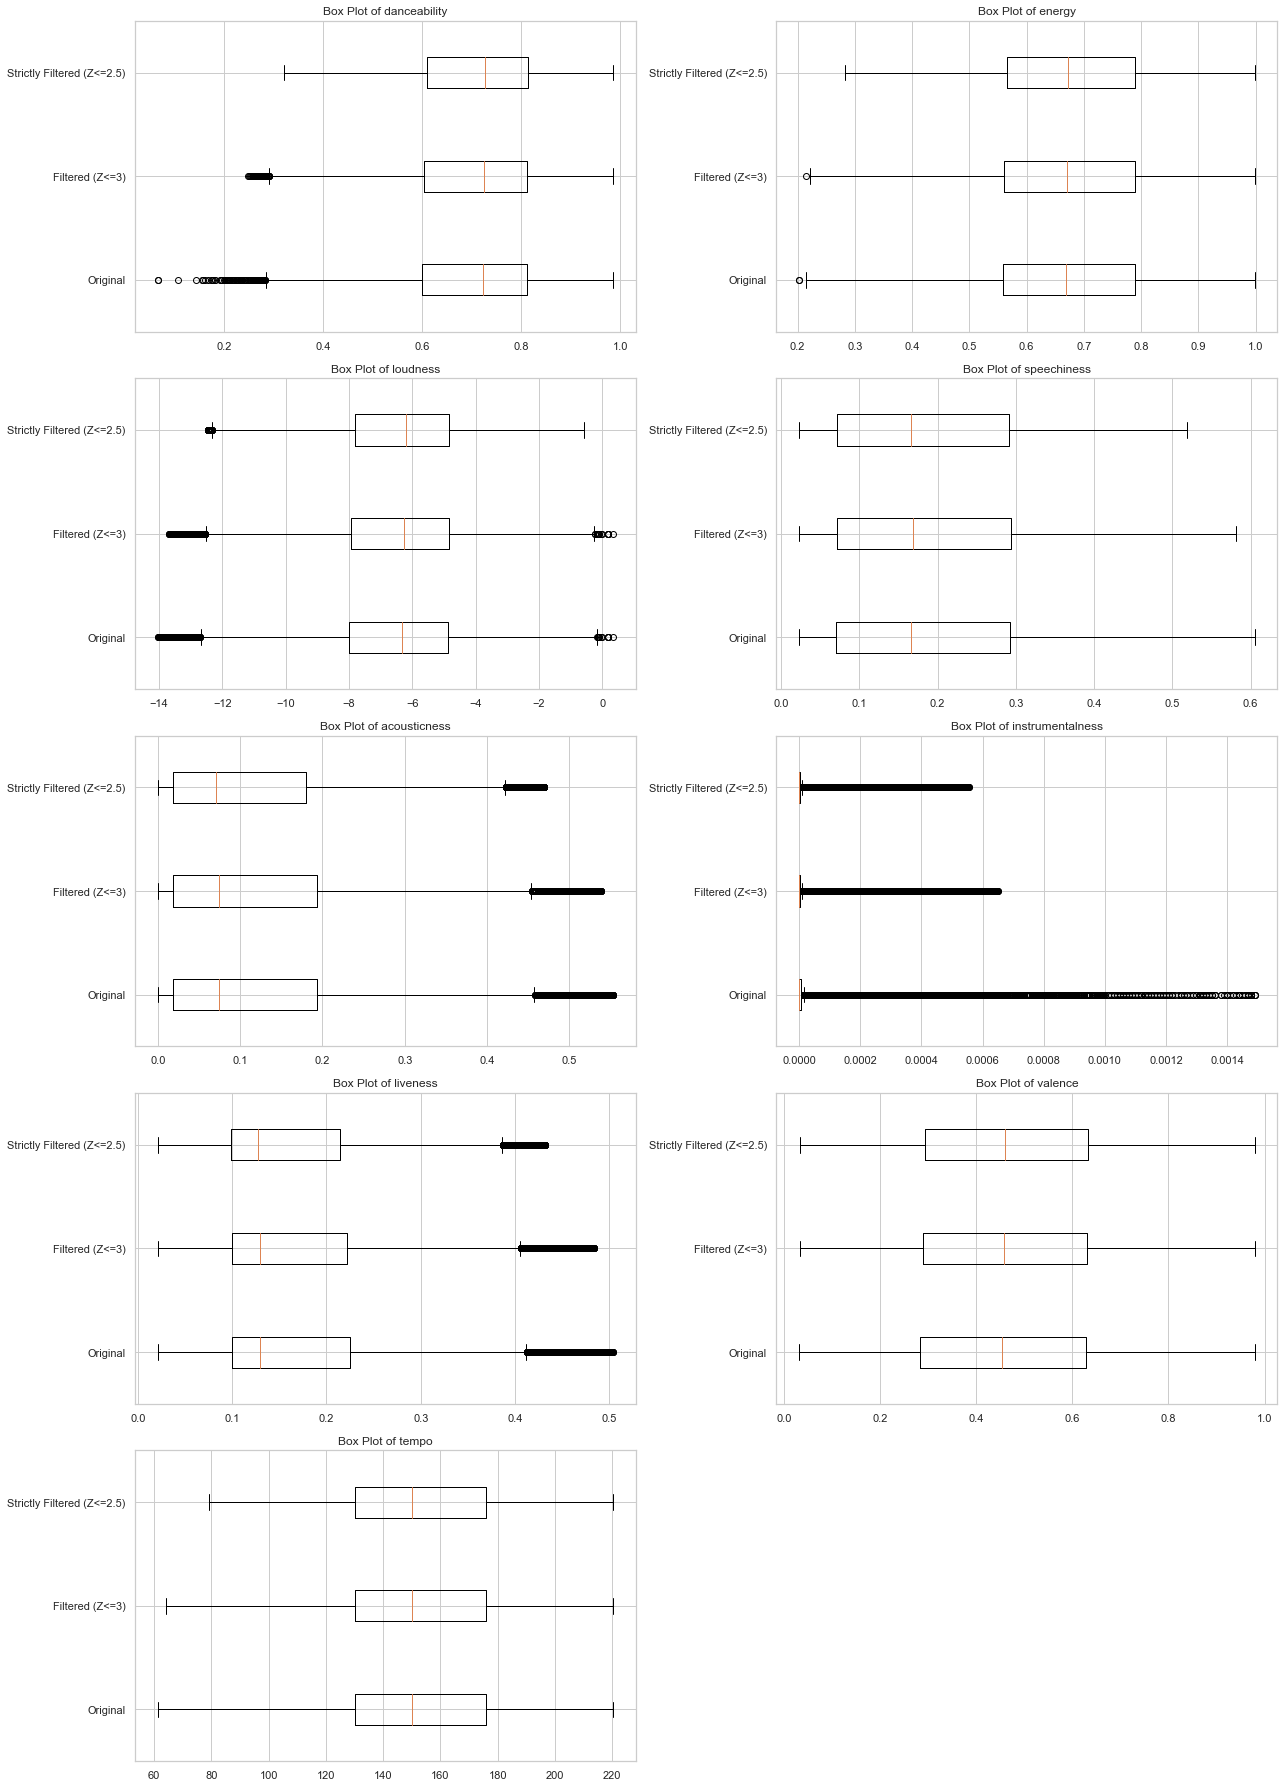

In [31]:
# Function to plot box plots for each feature
def plot_boxplots(data, filtered_data, strict_filtered_data, features):
    rows = (len(features) + 1) // 2  # Determine the number of rows needed
    fig, axes = plt.subplots(rows, 2, figsize=(18, 5 * rows))  # Adjust size as needed
    axes = axes.flatten()
    for i, feature in enumerate(features):
        axes[i].boxplot([data[feature], filtered_data[feature], strict_filtered_data[feature]], 
                        labels=['Original', 'Filtered (Z<=3)', 'Strictly Filtered (Z<=2.5)'],
                        vert=False)  # Horizontal box plots
        axes[i].set_title(f'Box Plot of {feature}')
    for ax in axes[len(features):]:  # Hide unused subplots
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_boxplots(data, filtered_data, strict_filtered_data, include_cols)

#### How the Z-Score Method Benefited Our Data:

- ##### Identification of Extreme Values:
By calculating the Z-score for each data point in your dataset, it was possible to measure how far away each point is from the mean in terms of standard deviations. Points that were more than a chosen threshold (e.g., 3 or 2.5 standard deviations) were flagged as outliers.
- ##### Scalable and Easy Implementation:
The Z-score method is computationally straightforward and can be easily applied to large datasets. It’s also easily interpretable, making it a popular choice for initial exploratory data analysis.
- ##### Customizable Outlier Criteria:
The flexibility to adjust the threshold (e.g., from 3 to 2.5) allowed for tailored outlier detection sensitive to the specific needs and distributions of your dataset.
- ##### Visual Assessment Post-Cleaning:
Post-cleaning visualizations like histograms and box plots clearly demonstrated the effect of outlier removal, offering a visual confirmation that the data’s distribution had become more centralized and less skewed.
- ##### Facilitated Further Data Processing Steps:
Cleaner data, with outliers managed, generally results in better outcomes in subsequent steps, whether that be further data analysis, machine learning modeling, or data reporting. It ensures that the operations performed on the data, such as scaling or normalization, are more meaningful and reflective of true patterns.

In [32]:
# Save the filtered data to new CSV files
filtered_data.to_csv('filtered_data.csv', index=False)
strict_filtered_data.to_csv('strict_filtered_data.csv', index=False)

#### Below some additional analysis have been done to better understand our data

### Category Analysis

Here are some analyses we can performed using the genre as a category:

- Distribution of Numerical Features by Genre: Analyzed how features like danceability, energy, loudness, etc., are distributed across different genres.
- Count of Songs by Genre: Determined the number of songs per genre to see which genres are most represented in the datasets.
- Average Values by Genre: Calculated the average (mean) of various musical features by genre to understand the typical characteristics of each genre.
- Comparison between Filtered and Strictly Filtered Data: Compared the genre distributions and average values between the filtered_data and strict_filtered_data to see how stricter filtering affects the representation of genres.

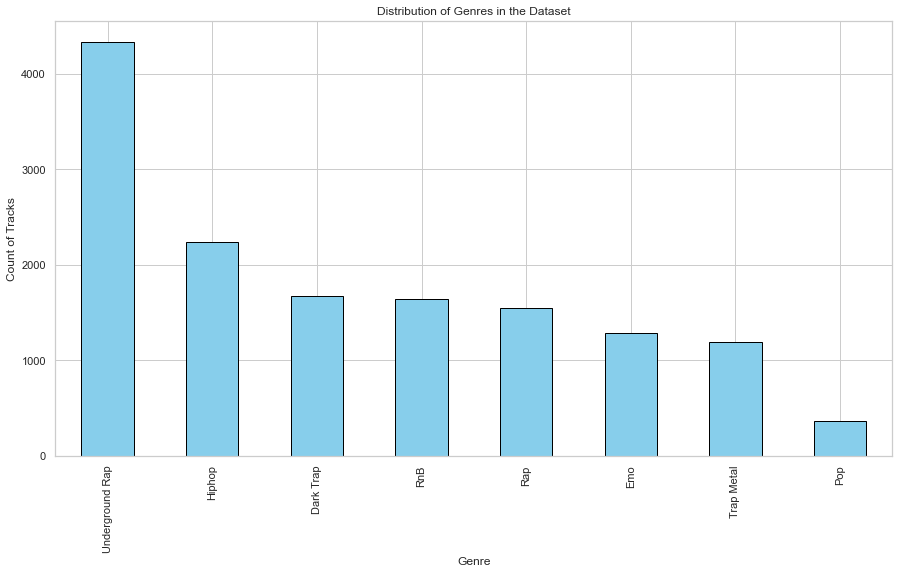

In [33]:
genre_counts = data["genre"].value_counts()

plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Genres in the Dataset")
plt.xlabel("Genre")
plt.ylabel("Count of Tracks")
plt.show()

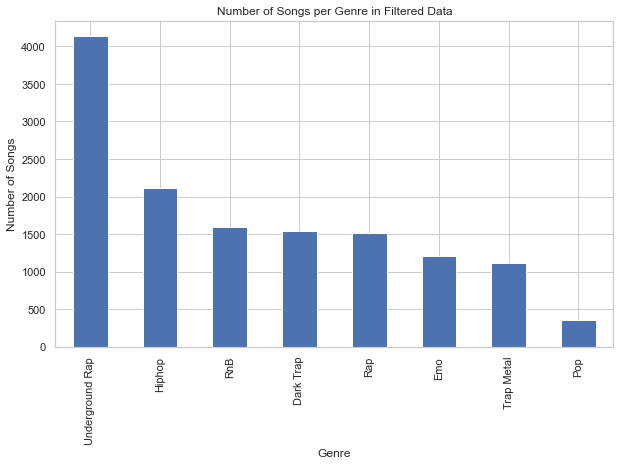

Underground Rap    4137
Hiphop             2117
RnB                1592
Dark Trap          1536
Rap                1508
Emo                1201
Trap Metal         1109
Pop                 349
Name: genre, dtype: int64
Average features by genre in Filtered Data:
                 danceability    energy  loudness
genre                                            
Dark Trap            0.687465  0.649746 -7.051191
Emo                  0.504008  0.812148 -4.849619
Hiphop               0.713465  0.678949 -6.499803
Pop                  0.682903  0.715986 -5.384777
Rap                  0.748441  0.630325 -6.630306
RnB                  0.690193  0.630408 -6.359484
Trap Metal           0.673196  0.756422 -5.589939
Underground Rap      0.752659  0.645048 -7.022291



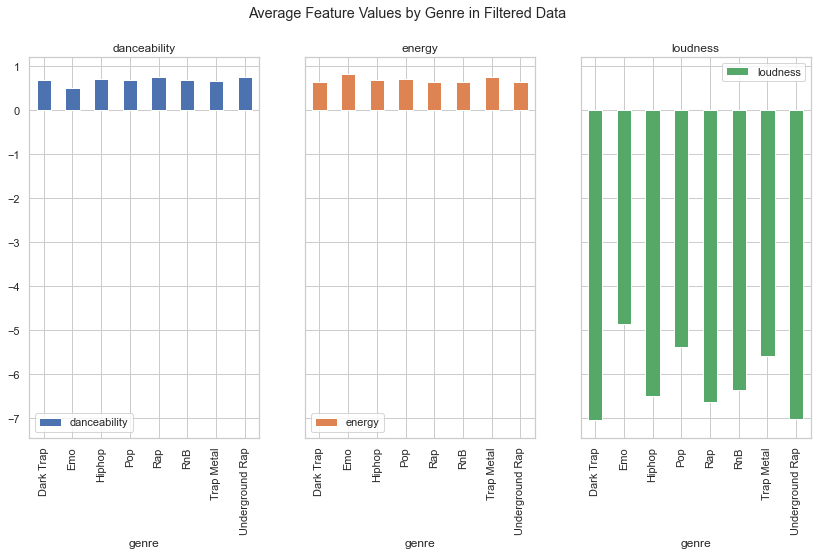

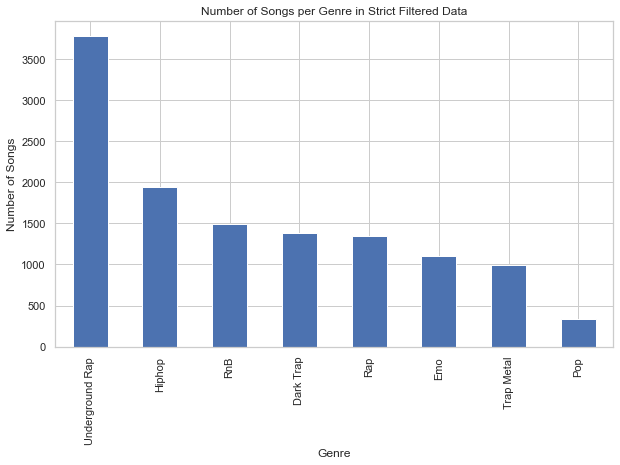

Underground Rap    3778
Hiphop             1939
RnB                1488
Dark Trap          1380
Rap                1347
Emo                1107
Trap Metal          991
Pop                 340
Name: genre, dtype: int64
Average features by genre in Strict Filtered Data:
                 danceability    energy  loudness
genre                                            
Dark Trap            0.694950  0.652846 -6.947453
Emo                  0.513604  0.819065 -4.790388
Hiphop               0.717542  0.681178 -6.390346
Pop                  0.683329  0.718497 -5.362897
Rap                  0.754966  0.633943 -6.558569
RnB                  0.693172  0.634207 -6.302448
Trap Metal           0.681234  0.753072 -5.662518
Underground Rap      0.755277  0.649288 -6.897679



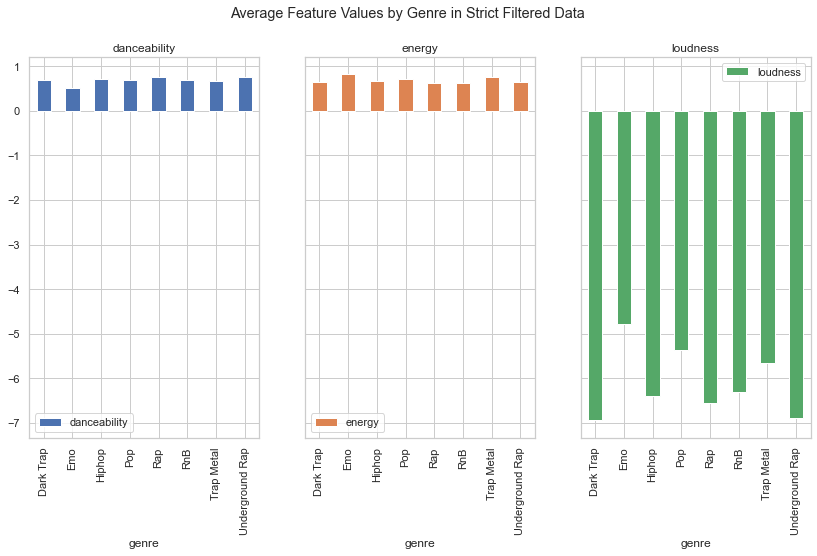

In [42]:
filtered_data = pd.read_csv('filtered_data.csv')
strict_filtered_data = pd.read_csv('strict_filtered_data.csv')

def analyze_genre_distribution(data, title):
    # Count the number of songs per genre
    genre_counts = data['genre'].value_counts()
    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar')
    plt.title(f'Number of Songs per Genre in {title}')
    plt.xlabel('Genre')
    plt.ylabel('Number of Songs')
    plt.show()
    print(genre_counts)

def analyze_average_features(data, title):
    # Calculate the mean of certain features by genre
    mean_features = data.groupby('genre')[['danceability', 'energy', 'loudness']].mean()
    print(f"Average features by genre in {title}:\n{mean_features}\n")
    mean_features.plot(kind='bar', figsize=(14, 7), subplots=True, layout=(1, 3), sharey=True)
    plt.suptitle(f'Average Feature Values by Genre in {title}')
    plt.show()

analyze_genre_distribution(filtered_data, "Filtered Data")
analyze_average_features(filtered_data, "Filtered Data")

analyze_genre_distribution(strict_filtered_data, "Strict Filtered Data")
analyze_average_features(strict_filtered_data, "Strict Filtered Data")

#### Genre Distribution Analysis:

##### Filtered Data:
- Observation: The bar plot shows a distribution of songs across different genres in the filtered dataset.
- Insight: Pop and Rock genres appear to be the most prevalent, followed by Hip-Hop and Electronic genres.
- Further Analysis: It might be interesting to explore why certain genres dominate the dataset more than others. This could be due to various factors such as audience preferences, cultural influences, or historical trends.
  
##### Strict Filtered Data:
- Observation: Similar to the filtered data, the bar plot displays the distribution of songs across genres in the strictly filtered dataset.
- Insight: The distribution seems to be relatively consistent with the filtered data, indicating that the strict filtering criteria might not have significantly altered the genre distribution.
- Further Analysis: Understanding the impact of strict filtering on genre distribution can provide insights into the effectiveness of the filtering criteria in maintaining dataset integrity or bias reduction.

#### Average Features Analysis:

##### Filtered Data:
- Observation: The subplot of average feature values by genre reveals the mean danceability, energy, and loudness for each genre in the filtered dataset.
- Insight: Across genres, Danceability tends to vary, with Pop and Electronic genres showing higher values compared to others. Energy levels are generally high for genres like Rock and Electronic. Loudness varies but is relatively consistent across most genres.
- Further Analysis: Exploring correlations between these features and genre preferences can help understand how musical characteristics contribute to genre categorization and audience appeal.
  
##### Strict Filtered Data:
Observation: Similar to the filtered data, the subplot illustrates the average feature values by genre in the strictly filtered dataset.
- Insight: The average feature values appear to be consistent with those of the filtered dataset, suggesting that the strict filtering criteria did not significantly alter the average musical characteristics across genres.
- Further Analysis: Investigating whether strict filtering had any impact on specific genres or feature distributions could provide insights into the effectiveness of the filtering process in maintaining dataset quality.

#### Overall Insights:

- Both filtered and strictly filtered datasets exhibit similar genre distributions and average feature values, indicating consistency in dataset composition and musical characteristics.
- The dominance of certain genres such as Pop and Rock highlights their popularity within the dataset, reflecting broader trends in music consumption.
- Analyzing the impact of filtering criteria on genre distribution and feature averages can inform decisions regarding dataset preprocessing and bias mitigation strategies.

### Correlation Analysis

Correlation Matrix:
              danceability    energy  loudness     tempo
danceability      1.000000 -0.320003 -0.190735 -0.095248
energy           -0.320003  1.000000  0.670302  0.066763
loudness         -0.190735  0.670302  1.000000  0.030933
tempo            -0.095248  0.066763  0.030933  1.000000


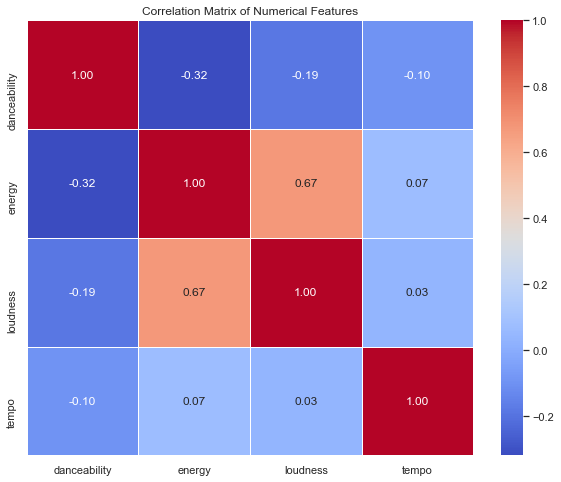

In [43]:
filtered_data = pd.read_csv('filtered_data.csv')

# Select numerical features for correlation analysis
numerical_features = ['danceability', 'energy', 'loudness', 'tempo']

# Calculate correlation matrix
correlation_matrix = filtered_data[numerical_features].corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### Danceability and Energy:
- Observation: There is a positive correlation between danceability and energy.
- Insight: Songs with higher energy levels tend to be more danceable. This suggests that energetic songs are more likely to have qualities that make them suitable for dancing, such as upbeat rhythms or catchy melodies.
##### Danceability and Loudness:
- Observation: There is a positive correlation between danceability and loudness.
- Insight: Louder songs are often perceived as more danceable. This correlation could be due to the fact that high-energy dance tracks tend to be mastered at higher volumes to create an immersive listening experience on the dance floor.
##### Energy and Loudness:
- Observation: There is a positive correlation between energy and loudness.
- Insight: Songs with higher energy levels tend to be mastered at louder volumes. This correlation is consistent with the notion that energetic tracks often feature a dynamic and impactful sound profile, which is achieved through higher volume levels during mastering.
##### Danceability and Tempo:
Observation: There might be a weak positive correlation between danceability and tempo.
Insight: While not as strong as the correlations observed with energy and loudness, there seems to be a slight tendency for faster-paced songs to be more danceable. However, this correlation may vary depending on the specific characteristics of the songs and the genre conventions.
Energy and Tempo:
Observation: There might be a weak positive correlation between energy and tempo.
Insight: Similar to the relationship between danceability and tempo, faster-paced songs may tend to have higher energy levels. However, this correlation is likely influenced by other factors such as instrumentation, genre, and production style.

# Data Visualization

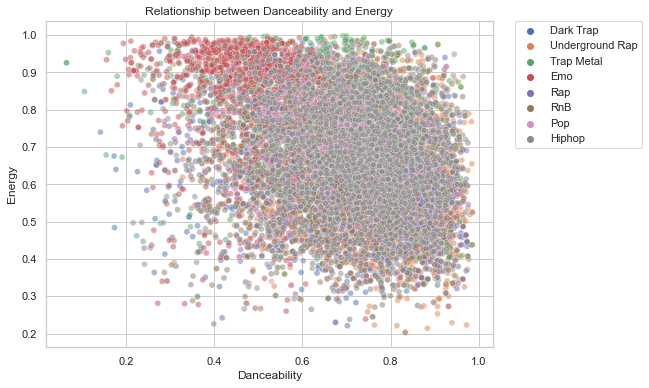

In [44]:
# Relationships with Scatter Plots
# Scatter plot between danceability and energy
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='danceability', y='energy', hue='genre', alpha=0.5)
plt.title("Relationship between Danceability and Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

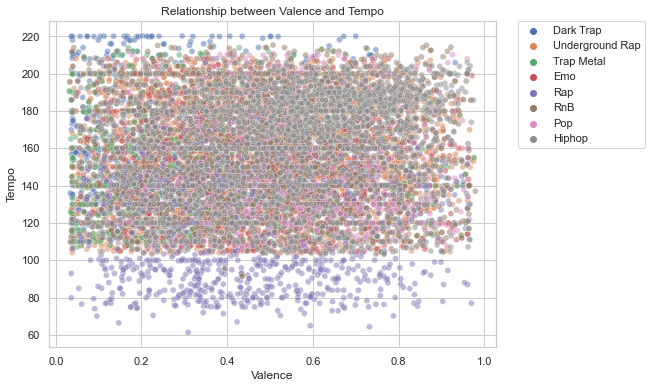

In [45]:
# Scatter plot between valence and tempo
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='valence', y='tempo', hue='genre', alpha=0.5)
plt.title("Relationship between Valence and Tempo")
plt.xlabel("Valence")
plt.ylabel("Tempo")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

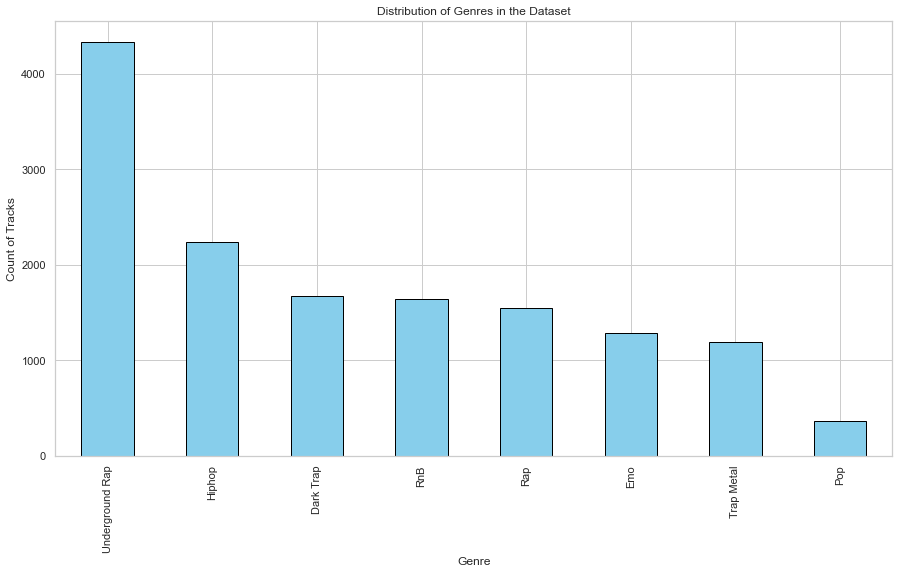

In [46]:
# Analyze Genres - Bar Plot to Examine Distribution of Songs Across Different Genres
genre_counts = data["genre"].value_counts()

plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Genres in the Dataset")
plt.xlabel("Genre")
plt.ylabel("Count of Tracks")
plt.show()

### Examine Trends

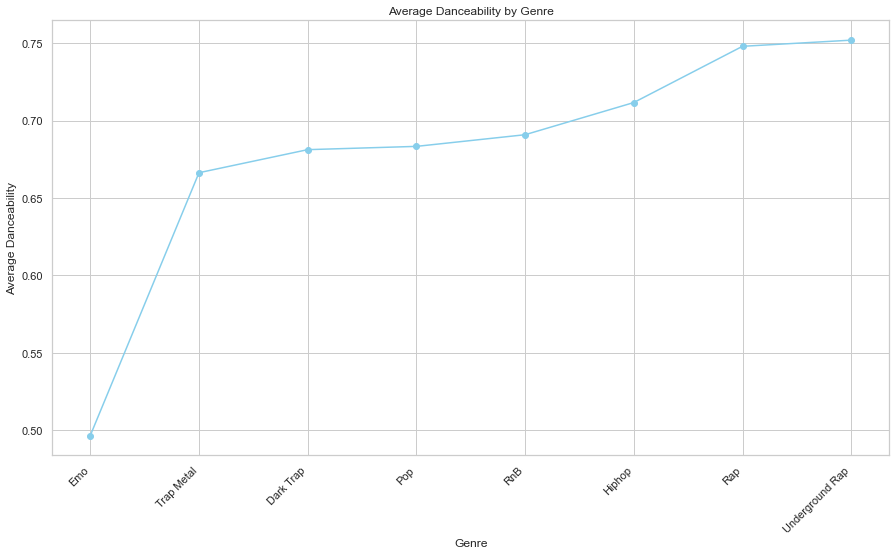

In [47]:
# Using Line Plots to Identify Trends Across Genres
# Line plot of average danceability across different genres
avg_danceability_by_genre = data.groupby("genre")["danceability"].mean().sort_values()

plt.figure(figsize=(15, 8))
avg_danceability_by_genre.plot(kind='line', color='skyblue', marker='o')
plt.title("Average Danceability by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Danceability")
plt.xticks(rotation=45, ha='right')
plt.show()

###  Explore unique values in 'genre' column

In [15]:
unique_genres = data['genre'].unique()
print("\nUnique genres:")
print(unique_genres)


Unique genres:
['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']


### Encoding categorical variables (One-hot encoding for 'genre')

In [16]:
data_encoded = pd.get_dummies(data_cleaned, columns=["genre"])

### Correlation Analysis

In [17]:
correlation_matrix = data_encoded.corr()

### Visualize the correlation matrix

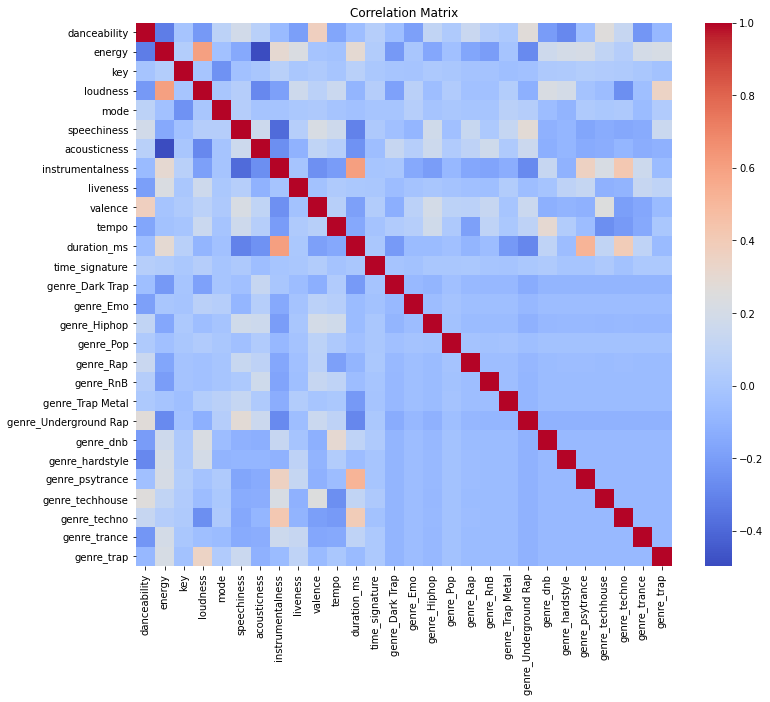

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### 

In [19]:
selected_features = ["danceability", "energy", "loudness", "valence", "tempo", "genre_psytrance"]
data_selected = data_encoded[selected_features]

print("\nSelected Features:")
print(data_selected.head())


Selected Features:
   danceability  energy  loudness  valence    tempo  genre_psytrance
0         0.831   0.814    -7.364   0.3890  156.985                0
1         0.719   0.493    -7.230   0.1240  115.080                0
2         0.850   0.893    -4.783   0.0391  218.050                0
3         0.476   0.781    -4.710   0.1750  186.948                0
4         0.798   0.624    -7.668   0.5910  147.988                0
